In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
import seaborn as sns

In [43]:

iris = pd.read_csv(r"C:\Users\marca\OneDrive\Documentos\6 semestre neuro\Neurociencias-2025-2\S03_datasets\iris\iris.csv")



In [44]:
# Preparamos los datos 
X = iris[['Petal.Length', 'Petal.Width']].values  # Usamos largo y ancho del pétalo
y = iris['Species'].astype('category').cat.codes  # Convertimos especies a números

nombres_flores = ['Setosa', 'Versicolor', 'Virginica']
nombres_caracteristicas = ['Longitud del pétalo (cm)', 'Ancho del pétalo (cm)']

In [45]:
# Dividimos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo SVM (explicar parámetros sencillos)
modelo = svm.SVC(kernel='rbf', C=1.0)  # RBF es el tipo de "forma" que usa para separar
modelo.fit(X_train, y_train)            # Entrenamos con los datos

SVC()


📊 Exactitud del modelo: 100.0%


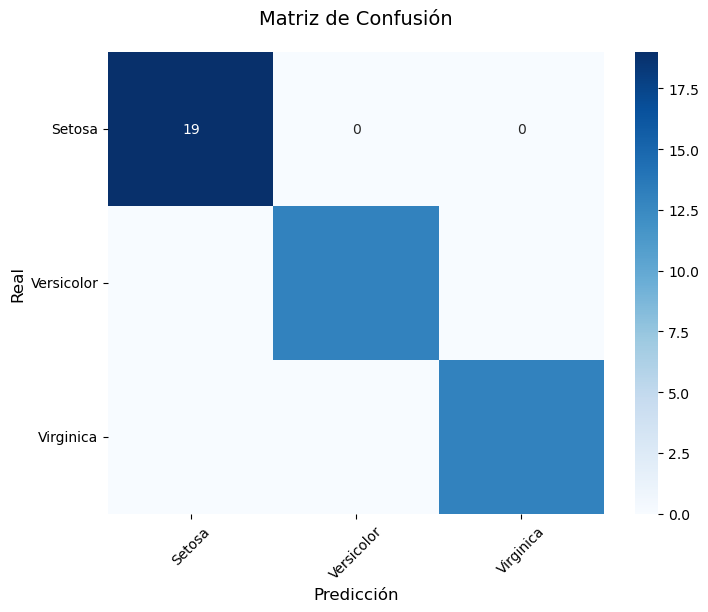

In [46]:
# 3. Evaluación y Matriz de Confusión Visual
# ---------------------------------------------------------------
y_pred = modelo.predict(X_test)
exactitud = accuracy_score(y_pred, y_test)

print(f"\n📊 Exactitud del modelo: {exactitud:.1%}")

# Crear matriz de confusión visual
matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=nombres_flores,
            yticklabels=nombres_flores)
plt.title('Matriz de Confusión', fontsize=14, pad=20)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


🎨 Visualización interactiva:


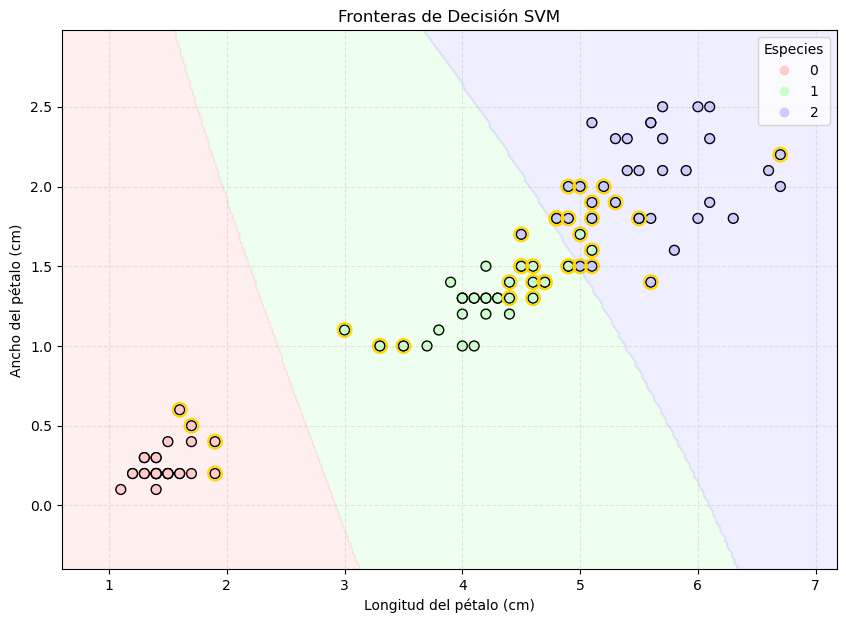

In [47]:
def svm_iris_didactico():
    # Configuración
    plt.style.use('seaborn')
    sns.set_palette("husl")

def mostrar_fronteras(X, y, model):
    # Configuración de colores
    colores = ['#FFCCCC', '#CCFFCC', '#CCCCFF']
    cmap = ListedColormap(colores[:len(np.unique(y))])  
    
    # Generar malla
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predecir y graficar
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=cmap)
    
    # Destacar vectores de soporte
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='gold', 
                linewidths=1.5, label='Vectores clave')
    
    plt.title('Fronteras de Decisión SVM')
    plt.xlabel(nombres_caracteristicas[0])
    plt.ylabel(nombres_caracteristicas[1])
    plt.legend(*scatter.legend_elements(), title="Especies")
    plt.grid(linestyle='--', alpha=0.3)
    plt.show()

print("\n🎨 Visualización interactiva:")
mostrar_fronteras(X_train, y_train, modelo)

In [48]:
# Función para visualizar fronteras (DEFINIDA ANTES DE USARLA)
def dibujar_fronteras(modelo, titulo):
    # Configurar colores
    colores = ['#FFCCCC', '#AAFFAA', '#CCCCFF']
    cmap = ListedColormap(colores)
    
    # Generar malla
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predecir
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                         edgecolor='k', s=50, cmap=cmap)
    
    # Vectores de soporte
    plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='gold',
                linewidths=1.5, label='Vectores soporte')
    
    plt.title(titulo)
    plt.xlabel('Longitud del pétalo (cm)')
    plt.ylabel('Ancho del pétalo (cm)')
    plt.legend(*scatter.legend_elements(), title="Especies")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()


💡 ELIGE UNA OPCIÓN:
1. Cambiar C (regularización)
2. Cambiar kernel
3. Probar con valores manuales
4. Salir


Selección (1-4):  1



✨ EFECTO DEL PARÁMETRO C

🔧 Parámetros: C=0.1, kernel='rbf'
📊 Precisión: 100.0%


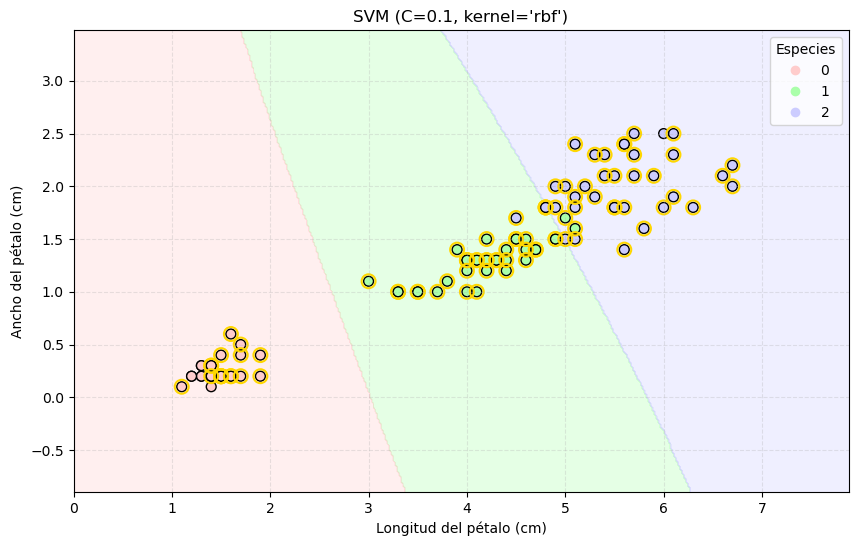


🔧 Parámetros: C=1.0, kernel='rbf'
📊 Precisión: 100.0%


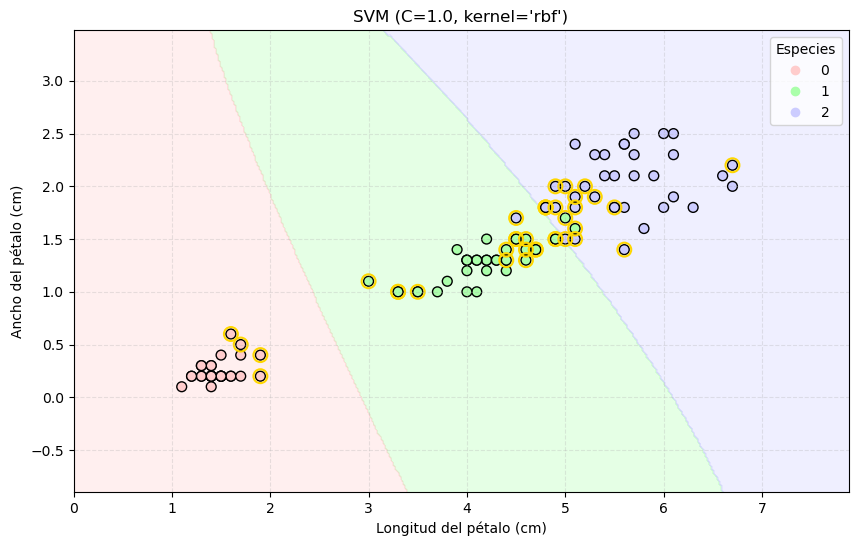


🔧 Parámetros: C=10.0, kernel='rbf'
📊 Precisión: 100.0%


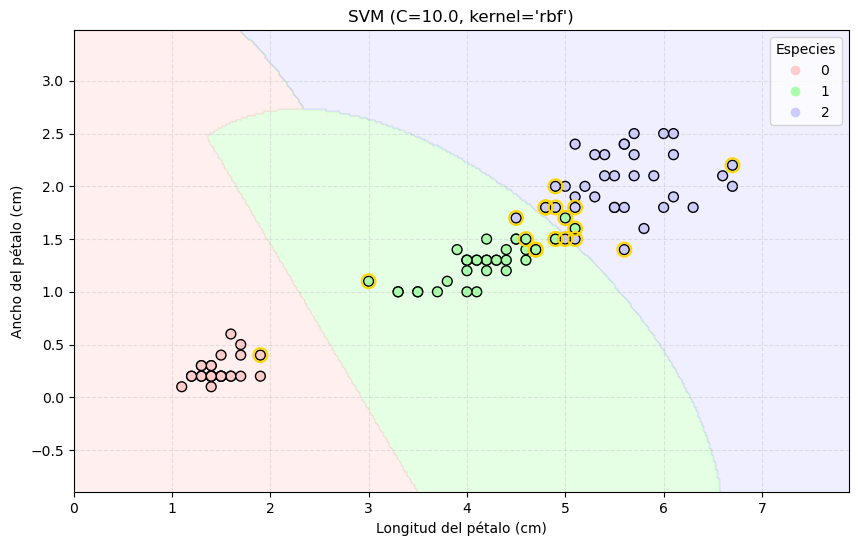


💡 ELIGE UNA OPCIÓN:
1. Cambiar C (regularización)
2. Cambiar kernel
3. Probar con valores manuales
4. Salir


Selección (1-4):  2



✨ COMPARANDO KERNELS

🔧 Parámetros: C=1.0, kernel='linear'
📊 Precisión: 100.0%


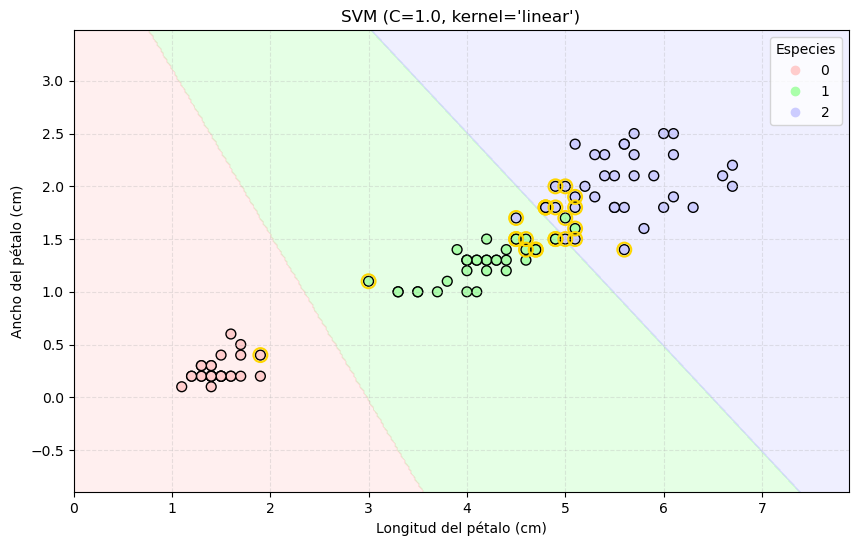


🔧 Parámetros: C=1.0, kernel='rbf'
📊 Precisión: 100.0%


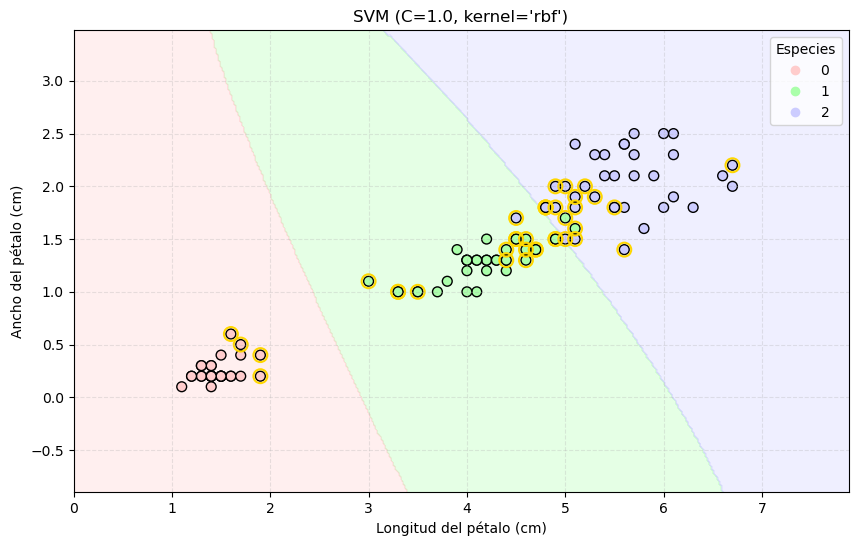


🔧 Parámetros: C=1.0, kernel='poly'
📊 Precisión: 100.0%


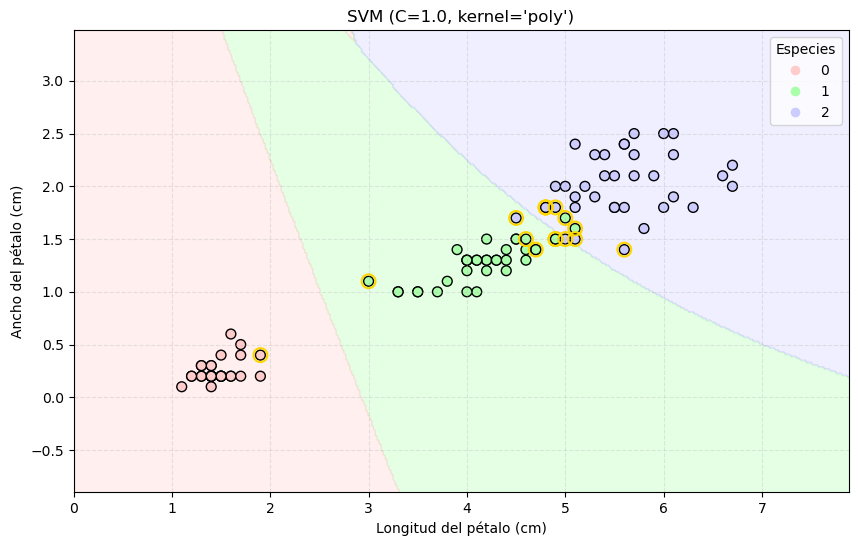


💡 ELIGE UNA OPCIÓN:
1. Cambiar C (regularización)
2. Cambiar kernel
3. Probar con valores manuales
4. Salir


Selección (1-4):  3



🌻 PRUEBA MANUAL


In [ ]:
# Función para probar modelos
def probar_modelo(C=1.0, kernel='rbf'):
    modelo = svm.SVC(C=C, kernel=kernel)
    modelo.fit(X_train, y_train)
    print(f"\n🔧 Parámetros: C={C}, kernel='{kernel}'")
    print(f"📊 Precisión: {modelo.score(X_test, y_test):.1%}")
    dibujar_fronteras(modelo, f"SVM (C={C}, kernel='{kernel}')")

# Menú interactivo
while True:
    print("\n💡 ELIGE UNA OPCIÓN:")
    print("1. Cambiar C (regularización)")
    print("2. Cambiar kernel")
    print("3. Probar con valores manuales")
    print("4. Salir")
    
    opcion = input("Selección (1-4): ")
    
    if opcion == '1':
        print("\n✨ EFECTO DEL PARÁMETRO C")
        for C in [0.1, 1.0, 10.0]:
            probar_modelo(C=C, kernel='rbf')
            
    elif opcion == '2':
        print("\n✨ COMPARANDO KERNELS")
        for kernel in ['linear', 'rbf', 'poly']:
            probar_modelo(C=1.0, kernel=kernel)
            
    elif opcion == '3':
        print("\n🌻 PRUEBA MANUAL")
        try:
            modelo = svm.SVC(C=1.0, kernel='rbf').fit(X_train, y_train)
            long = float(input("Longitud pétalo (1-7 cm): "))
            ancho = float(input("Ancho pétalo (0.1-2.5 cm): "))
            
            pred = modelo.predict([[long, ancho]])[0]
            print(f"\n🔍 Clasificación: {iris.target_names[pred]}")
            
            # Mostrar en gráfico
            plt.figure(figsize=(10, 6))
            plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
            plt.scatter(long, ancho, s=200, marker='*', c='purple', label='Tu flor')
            plt.xlabel('Longitud del pétalo (cm)')
            plt.ylabel('Ancho del pétalo (cm)')
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.3)
            plt.title("Tu flor en el espacio de características")
            plt.show()
            
        except:
            print("¡Ingresa valores numéricos válidos!")
            
    elif opcion == '4':
        print("¡Hasta luego! 👋")
        break
        
    else:
        print("Opción no válida")